### Title: Prostate Cancer Detection and Outcome Forensics
### Author: Christopher Stemm
### Date: 22 September 2025 
### Modified By: Christopher Stemm 
### Description: Forensic analysis of the prostate_cancer_prediction dataset

In [284]:
import pandas as pd
df_prostate = pd.read_csv('prostate_cancer_prediction.csv')
# Making deep working copy.
df = df_prostate.copy(deep=True)
# Displaying dataframe columns with attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Cancer_Stage             27945 non-null  object 
 14  Treatment_Recommended 

In [286]:
df.drop('Patient_ID', axis=1, inplace=True)
df.describe()

,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,64.459939,7.751599,26.511605,56.902308,47.755770
std,14.404755,4.175012,4.888293,10.118064,18.704286
min,40.000000,0.500000,18.000000,40.000000,15.000000
25%,52.000000,4.130000,22.300000,48.000000,31.700000
50%,64.000000,7.750000,26.500000,57.000000,47.700000
75%,77.000000,11.320000,30.700000,66.000000,63.900000
max,89.000000,15.000000,35.000000,74.000000,80.000000


In [21]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

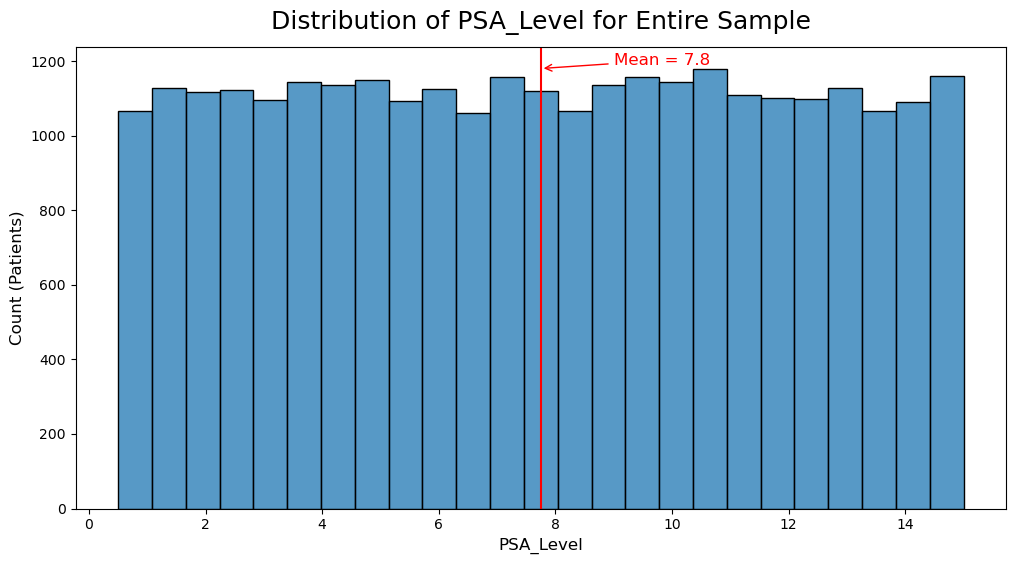

In [23]:
# Plotting histogram of PSA_Level.
plt.figure(figsize=(12, 6))
avg = df.PSA_Level.mean()
sns.histplot(df,
x = "PSA_Level",
bins=25)
plt.title("Distribution of PSA_Level for Entire Sample", fontsize=18, x=0.5, y=1.02)
plt.xlabel("PSA_Level", size=12)
plt.ylabel("Count (Patients)", size=12)
plt.axvline(x=avg,
color='red')
plt.annotate(f'Mean = {avg:.1f}', xy=(avg, 1180),
xytext=(9, 1190), fontsize=12, color='red', arrowprops=dict(arrowstyle="->", color='red'))
plt.savefig("PSA_Level_Total_Sample.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

**The distribution of PSA_Level is very uniform which indicates the sample is not random.**

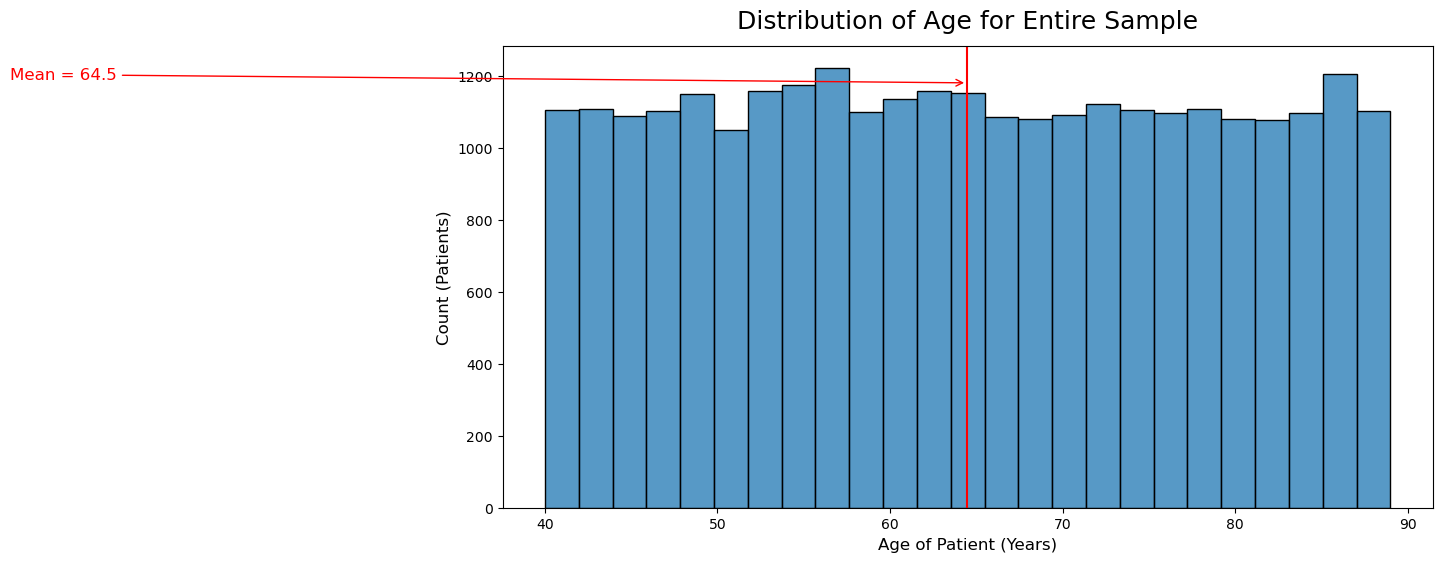

In [25]:
# Plotting histogram of Age.
plt.figure(figsize=(12, 6))
avg = df.Age.mean()
sns.histplot(df,
x = "Age",
bins=25)
plt.title("Distribution of Age for Entire Sample", fontsize=18, x=0.5, y=1.02)
plt.xlabel("Age of Patient (Years)", size=12)
plt.ylabel("Count (Patients)", size=12)
plt.axvline(x=avg,
color='red')
plt.annotate(f'Mean = {avg:.1f}', xy=(avg, 1180),
xytext=(9, 1190), fontsize=12, color='red', arrowprops=dict(arrowstyle="->", color='red'))
plt.savefig("Age_Total_Sample.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

**The distribution of age is fairly uniform.**

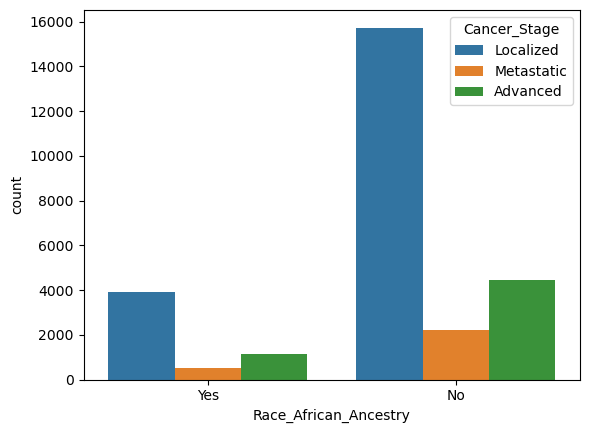

In [469]:
sns.countplot(data=df, x='Race_African_Ancestry', hue='Cancer_Stage')
plt.show()

**The cancer stage proportions of the African ancestry variable are very similar in contrast with reported statistics showing 
patients of African heritage having more advanced disease than the overall population.**


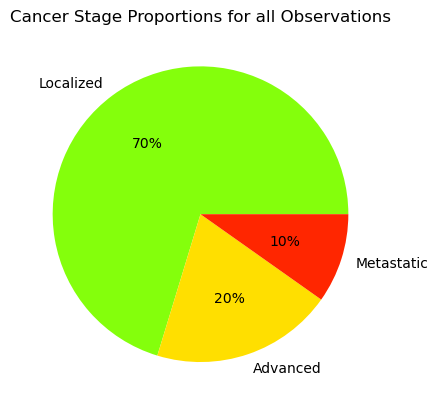

In [1821]:
# Group by Cancer_Stage
stage_counts = df['Cancer_Stage'].value_counts()
# Defining Seaborn color palette to use.
colors = sns.color_palette('gist_ncar')[2:5]
# Creating pie chart.
plt.pie(stage_counts, labels= stage_counts.index, colors = colors, autopct='%.0f%%')
plt.title('Cancer Stage Proportions for all Observations')
plt.show()

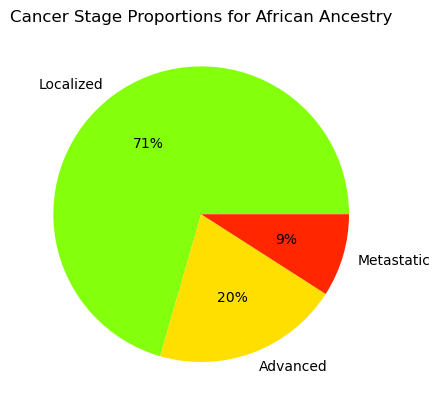

In [1837]:
# Group by Cancer_Stage
df_filtered = df[df['Race_African_Ancestry'] == 'Yes']
stage_counts = df_filtered['Cancer_Stage'].value_counts()
# Defining Seaborn color palette to use.
colors = sns.color_palette('gist_ncar')[2:5]
# Creating pie chart.
plt.pie(stage_counts, labels= stage_counts.index, colors = colors, autopct='%.0f%%')
plt.title('Cancer Stage Proportions for African Ancestry')
plt.show()

**The sample appears to be adjusted for race.**

In [33]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,78,68,54,82,47,60,78,58,62,50
Family_History,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes
Race_African_Ancestry,Yes,Yes,No,No,No,No,No,Yes,No,Yes
PSA_Level,5.07,10.24,13.79,8.03,1.89,9.8,9.27,2.45,3.97,10.24
DRE_Result,Normal,Normal,Normal,Abnormal,Normal,Normal,Normal,Normal,Abnormal,Abnormal
Biopsy_Result,Benign,Benign,Benign,Benign,Malignant,Malignant,Benign,Malignant,Benign,Benign
Difficulty_Urinating,No,Yes,No,No,Yes,Yes,Yes,No,No,Yes
Weak_Urine_Flow,No,No,No,No,Yes,Yes,No,No,Yes,No
Blood_in_Urine,No,No,No,No,No,No,No,No,No,No
Pelvic_Pain,No,Yes,Yes,No,No,No,No,No,No,No


<Figure size 1200x1000 with 0 Axes>

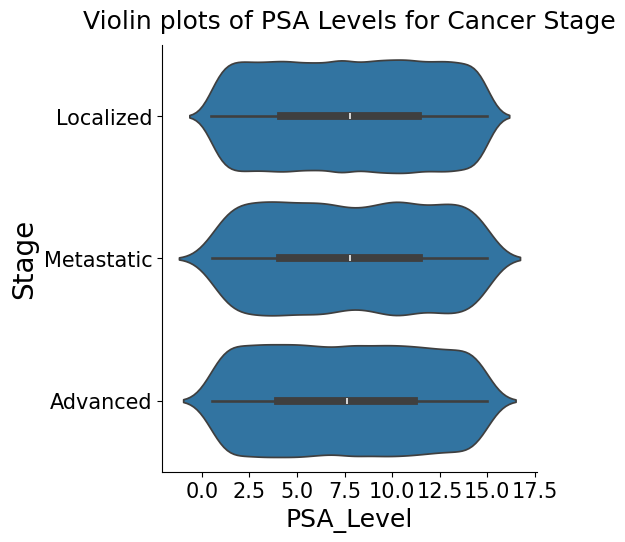

In [35]:
# Violin Plots of PSA Levels.
plt.figure(figsize=(12, 10))
sns.catplot(x="PSA_Level", y="Cancer_Stage", data=df, kind="violin")
plt.title("Violin plots of PSA Levels for Cancer Stage", fontsize=18, x=0.5, y=1.02)
plt.xlabel('PSA_Level', fontsize=18)
plt.ylabel('Stage',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("PSA_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

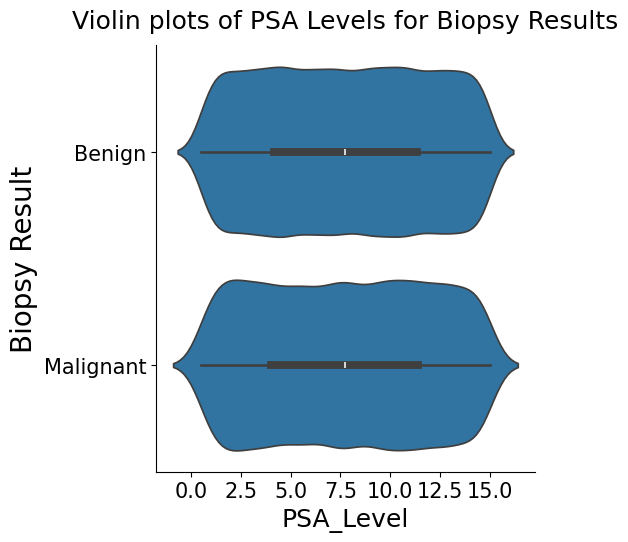

In [191]:
# Violin Plots of PSA Levels.
plt.figure(figsize=(12, 10))
sns.catplot(x="PSA_Level", y="Biopsy_Result", data=df, kind="violin")
plt.title("Violin plots of PSA Levels for Biopsy Results", fontsize=18, x=0.5, y=1.02)
plt.xlabel('PSA_Level', fontsize=18)
plt.ylabel('Biopsy Result',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("PSA_Biopsy", format='png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

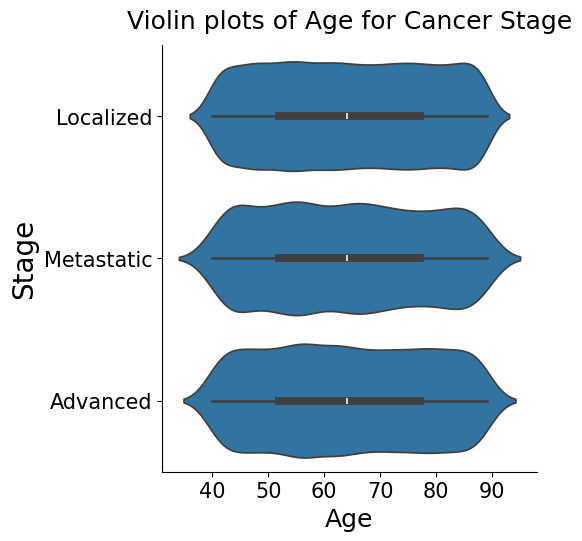

In [37]:
# Violin Plots of Age vs Cancer Stage.
plt.figure(figsize=(12, 10))
sns.catplot(x="Age", y="Cancer_Stage", data=df, kind="violin")
plt.title("Violin plots of Age for Cancer Stage", fontsize=18, x=0.5, y=1.02)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Stage',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("Age_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

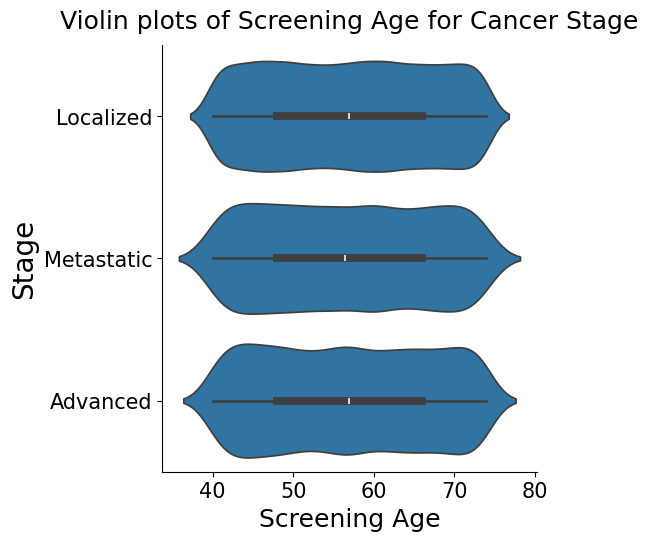

In [649]:
# Violin Plots of Screening_Age vs Cancer Stage.
plt.figure(figsize=(12, 10))
sns.catplot(x="Screening_Age", y="Cancer_Stage", data=df, kind="violin")
plt.title("Violin plots of Screening Age for Cancer Stage", fontsize=18, x=0.5, y=1.02)
plt.xlabel('Screening Age', fontsize=18)
plt.ylabel('Stage',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("Screening_Age_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

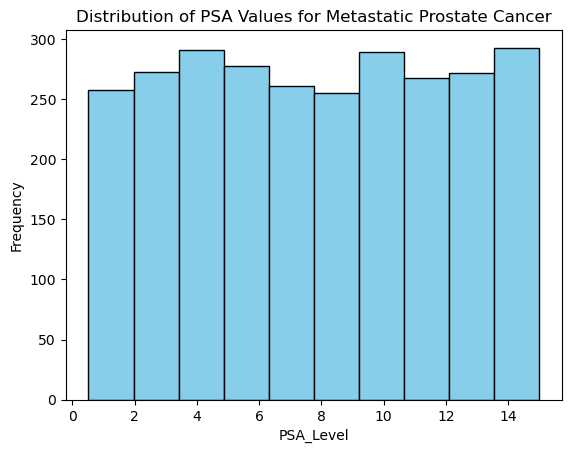

In [39]:
# Filter for a specific group 
group_Meta = df[df['Cancer_Stage'] == 'Metastatic']
# Plot the distribution of the 'PSA_Level' column for Group 'Metastatic'
plt.hist(group_Meta['PSA_Level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of PSA Values for Metastatic Prostate Cancer')
plt.xlabel('PSA_Level')
plt.ylabel('Frequency')
plt.show()

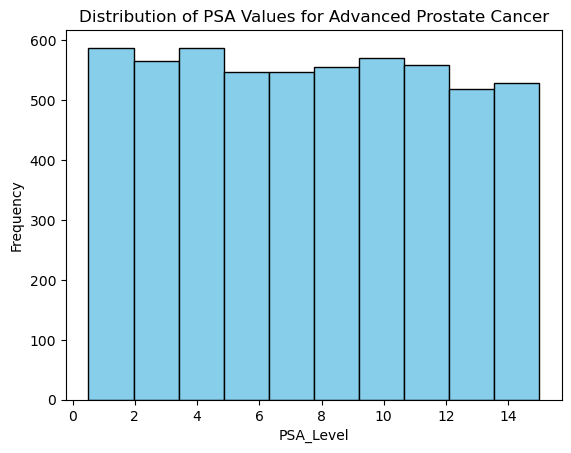

In [41]:
# Filter for a specific group
group_Adv = df[df['Cancer_Stage'] == 'Advanced']
# Plot the distribution of the 'PSA_Level' column for Group 'Metastatic'
plt.hist(group_Adv['PSA_Level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of PSA Values for Advanced Prostate Cancer')
plt.xlabel('PSA_Level')
plt.ylabel('Frequency')
plt.show()

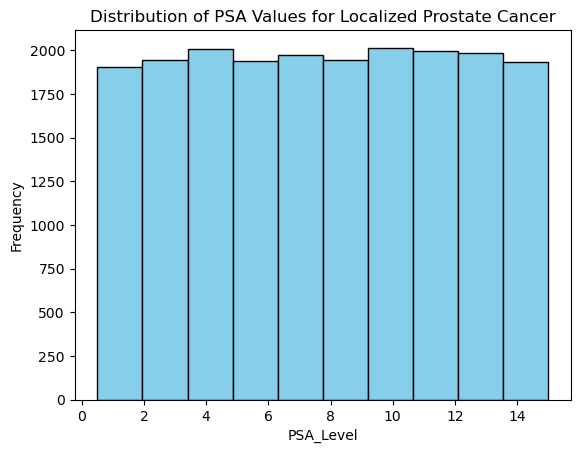

In [43]:
# Filter for a specific group
group_Loc = df[df['Cancer_Stage'] == 'Localized']

# Plot the distribution of the 'PSA_Level' column for Group 'Localized'
plt.hist(group_Loc['PSA_Level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of PSA Values for Localized Prostate Cancer')
plt.xlabel('PSA_Level')
plt.ylabel('Frequency')
plt.show()

**PSA_Level is a control variable for the sample**

<Figure size 1200x1000 with 0 Axes>

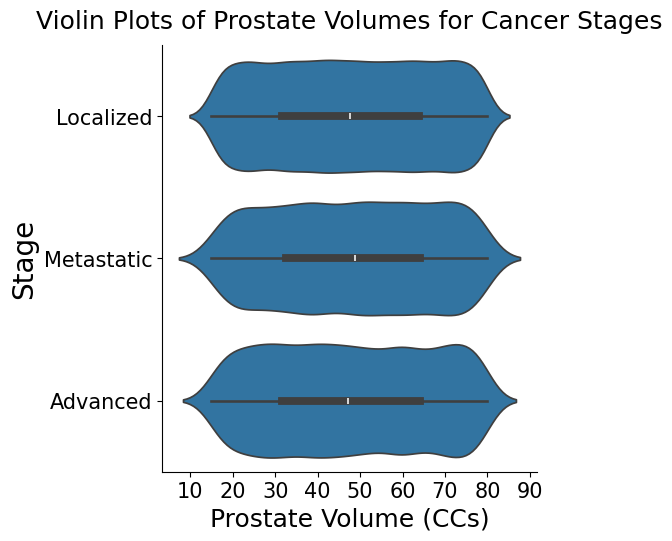

In [45]:
# Violin Plots of Prostate Volume for Cancer Stages.
plt.figure(figsize=(12, 10))
sns.catplot(x="Prostate_Volume", y="Cancer_Stage", data=df, kind="violin")
plt.title("Violin Plots of Prostate Volumes for Cancer Stages", fontsize=18, x=0.5, y=1.02)
plt.xlabel('Prostate Volume (CCs)', fontsize=18)
plt.ylabel('Stage',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("Gland_Volume_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

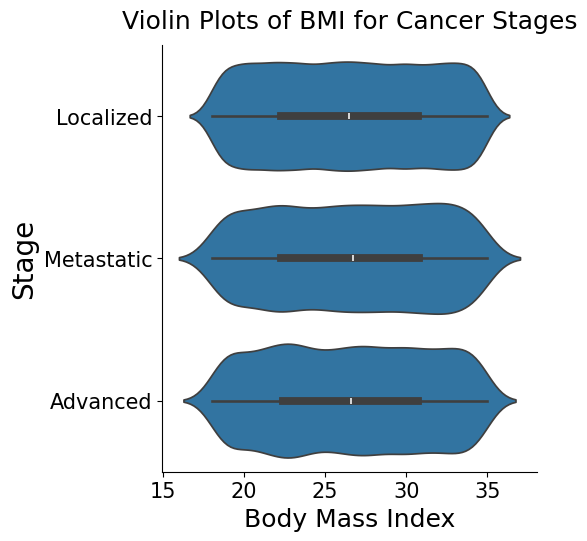

In [47]:
# Violin Plots of BMI for Cancer Stages.
plt.figure(figsize=(12, 10))
sns.catplot(x="BMI", y="Cancer_Stage", data=df, kind="violin")
plt.title("Violin Plots of BMI for Cancer Stages", fontsize=18, x=0.5, y=1.02)
plt.xlabel('Body Mass Index', fontsize=18)
plt.ylabel('Stage',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("BMI_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\cstem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


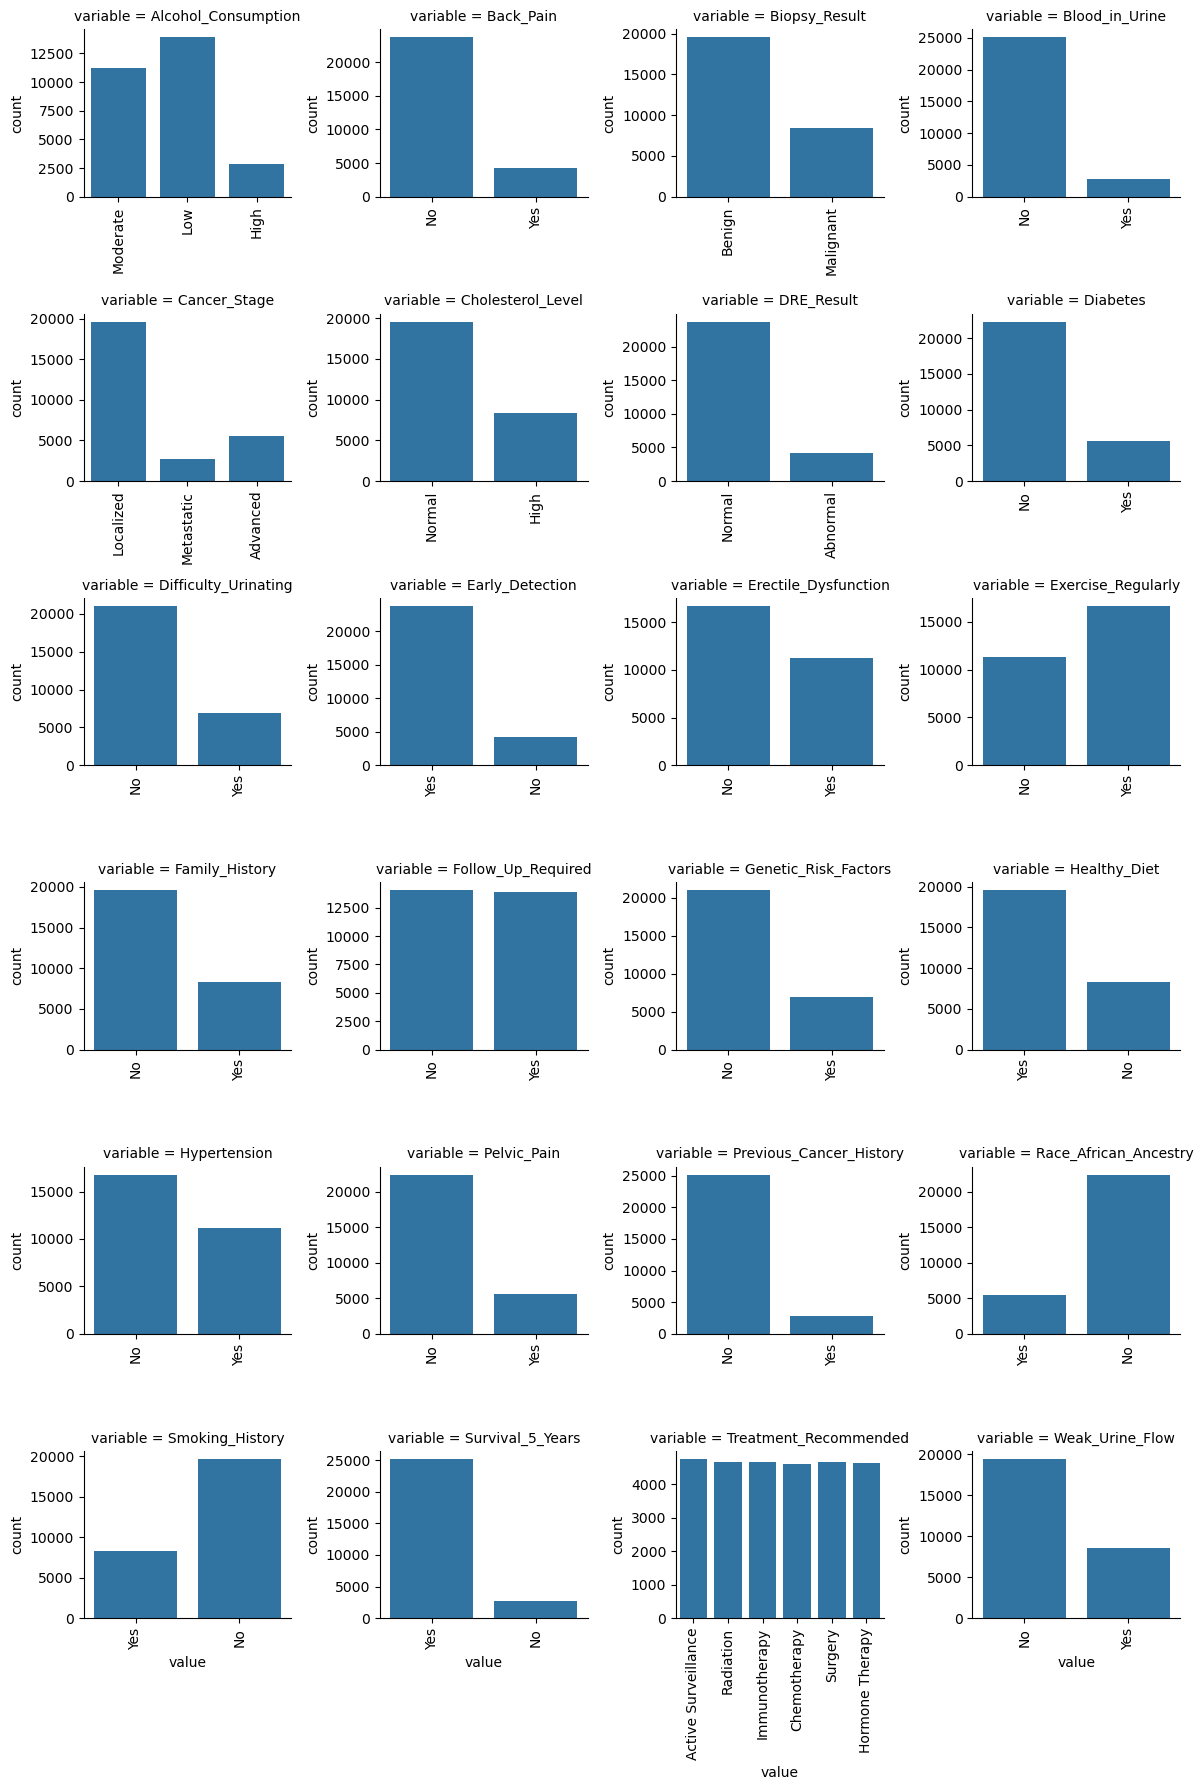

In [208]:
# Frequency plots of categorical features.
cat_features = df.select_dtypes(include=['object']).columns
f = pd.melt(df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

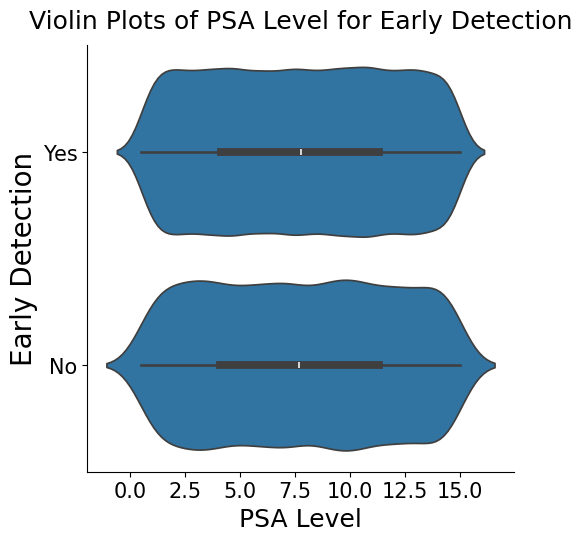

In [210]:
# Violin Plots of PSA_Level for Early_Detection.
plt.figure(figsize=(12, 10))
sns.catplot(x="PSA_Level", y="Early_Detection", data=df, kind="violin")
plt.title("Violin Plots of PSA Level for Early Detection", fontsize=18, x=0.5, y=1.02)
plt.xlabel('PSA Level', fontsize=18)
plt.ylabel('Early Detection',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("PSA_Early_detect_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

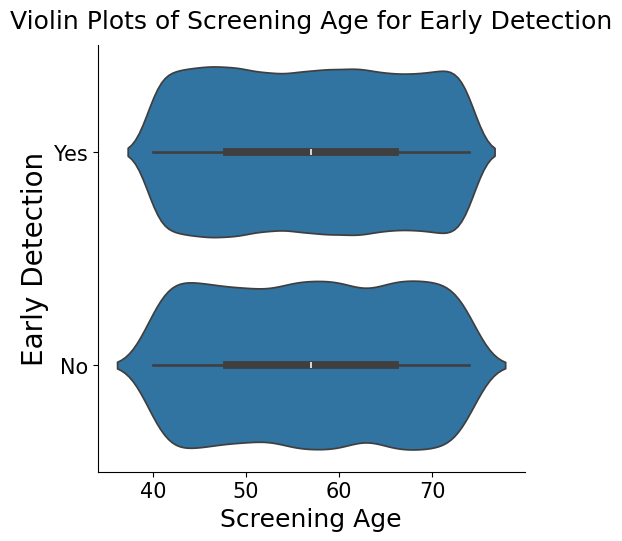

In [212]:
# Violin Plots of Screening Age for Early Detection.
plt.figure(figsize=(12, 10))
sns.catplot(x="Screening_Age", y="Early_Detection", data=df, kind="violin")
plt.title("Violin Plots of Screening Age for Early Detection", fontsize=18, x=0.5, y=1.02)
plt.xlabel('Screening Age', fontsize=18)
plt.ylabel('Early Detection',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig("ScreenAge_EarltDetect_Violin", format='png', bbox_inches='tight', dpi=300)
plt.show()

In [1841]:
from scipy.stats import f_oneway
local_group = df.Screening_Age[df.Cancer_Stage == 'Localized'].tolist()
advance_group = df.Screening_Age[df.Cancer_Stage == 'Advanced'].tolist()
meta_group = df.Screening_Age[df.Cancer_Stage == 'Metastatic'].tolist()

# Conduct the one-way ANOVA
F, p = f_oneway(local_group, advance_group, meta_group)
print(f"F-statistic: {F}, p-value: {p}")

F-statistic: 0.43741203560554887, p-value: 0.6457097443185909


**Screening_Age is statistically unrelated to Early_Dectection when there is a known relationship where early detection is more probable at an earlier screening age.**

**I will drop controlled variables and those which leak the stage of cancer. Few people know their genetic risk factors, so I will drop this as well.**

In [1573]:
df1 = df.drop(['Age', 'Screening_Age', 'Survival_5_Years', 'Biopsy_Result', 'BMI', 'PSA_Level'], axis=1)

In [1575]:
df1.drop(['DRE_Result', 'Genetic_Risk_Factors', 'Follow_Up_Required', 'Prostate_Volume', 'Treatment_Recommended'], axis=1, inplace=True)

In [1577]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Family_History           27945 non-null  object
 1   Race_African_Ancestry    27945 non-null  object
 2   Difficulty_Urinating     27945 non-null  object
 3   Weak_Urine_Flow          27945 non-null  object
 4   Blood_in_Urine           27945 non-null  object
 5   Pelvic_Pain              27945 non-null  object
 6   Back_Pain                27945 non-null  object
 7   Erectile_Dysfunction     27945 non-null  object
 8   Cancer_Stage             27945 non-null  object
 9   Exercise_Regularly       27945 non-null  object
 10  Healthy_Diet             27945 non-null  object
 11  Smoking_History          27945 non-null  object
 12  Alcohol_Consumption      27945 non-null  object
 13  Hypertension             27945 non-null  object
 14  Diabetes                 27945 non-nul

In [1579]:
stage_dict = {'Localized':0, 'Metastatic':1, 'Advanced':0}
df1['Cancer_Stage'] = df1['Cancer_Stage'].map(stage_dict)

**I have combined advanced and localized cancer stages to create an encoded binary variable because there is boundary between metastatic and other stages that is close to curable/uncurable.**

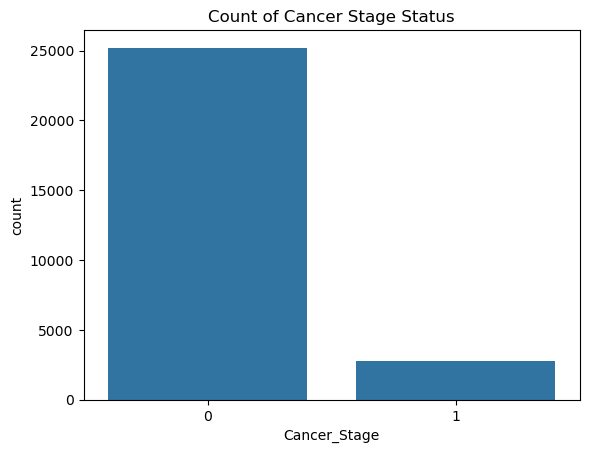

In [1581]:
sns.countplot(df1, x='Cancer_Stage')
plt.title('Count of Cancer Stage Status')
plt.show()

## Variable Relationships

In [1583]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Family_History           27945 non-null  object
 1   Race_African_Ancestry    27945 non-null  object
 2   Difficulty_Urinating     27945 non-null  object
 3   Weak_Urine_Flow          27945 non-null  object
 4   Blood_in_Urine           27945 non-null  object
 5   Pelvic_Pain              27945 non-null  object
 6   Back_Pain                27945 non-null  object
 7   Erectile_Dysfunction     27945 non-null  object
 8   Cancer_Stage             27945 non-null  int64 
 9   Exercise_Regularly       27945 non-null  object
 10  Healthy_Diet             27945 non-null  object
 11  Smoking_History          27945 non-null  object
 12  Alcohol_Consumption      27945 non-null  object
 13  Hypertension             27945 non-null  object
 14  Diabetes                 27945 non-nul

**I will encode the categorical variables for machine learning and oversample the minority class of the target. The data will then be split into training and hold out sets.**

In [1345]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb
import scipy.stats as stats

In [1755]:
# Splitting the data into a traing and test set.
X = df1.drop(['Cancer_Stage'], axis=1)
y = df1['Cancer_Stage']

from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config

set_config(transform_output="pandas")  # Returns a dataframe vs. matrix.

oe = OrdinalEncoder()
oe.fit(X)  # Using OrdinalEncoder with no ranking sequence.

X_enc = oe.transform(X)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_rs, y_rs = smote.fit_resample(X_enc, y)
X_rs = np.round(X_rs)

X_train, X_test, y_train, y_test = train_test_split(X_rs,y_rs,train_size=0.8, random_state=99)
X_train.head()

,Family_History,Race_African_Ancestry,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,Pelvic_Pain,Back_Pain,Erectile_Dysfunction,Exercise_Regularly,Healthy_Diet,Smoking_History,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Previous_Cancer_History,Early_Detection
44233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
28311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0
5541,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
37762,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


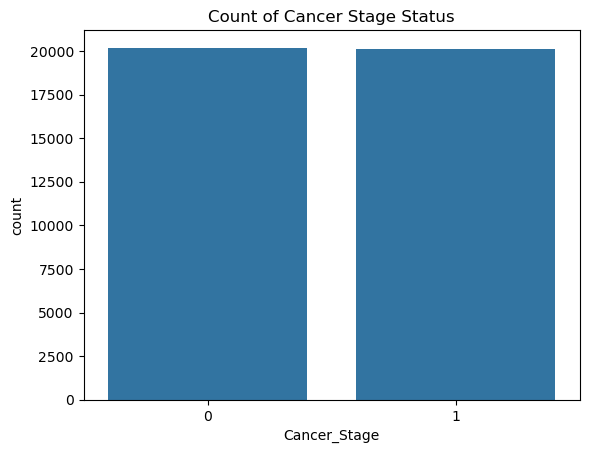

In [1757]:
sns.countplot(y_train.to_frame(), x='Cancer_Stage')
plt.title('Count of Cancer Stage Status')
plt.show()

## Feature Filtering

In [1759]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40331 entries, 44233 to 29313
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family_History           40331 non-null  float64
 1   Race_African_Ancestry    40331 non-null  float64
 2   Difficulty_Urinating     40331 non-null  float64
 3   Weak_Urine_Flow          40331 non-null  float64
 4   Blood_in_Urine           40331 non-null  float64
 5   Pelvic_Pain              40331 non-null  float64
 6   Back_Pain                40331 non-null  float64
 7   Erectile_Dysfunction     40331 non-null  float64
 8   Exercise_Regularly       40331 non-null  float64
 9   Healthy_Diet             40331 non-null  float64
 10  Smoking_History          40331 non-null  float64
 11  Alcohol_Consumption      40331 non-null  float64
 12  Hypertension             40331 non-null  float64
 13  Diabetes                 40331 non-null  float64
 14  Cholesterol_Level      

**A decision tree will be used for feature selection.**

In [1761]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Evaluate the model with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8148368541108797

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      5018
           1       0.76      0.92      0.83      5065

    accuracy                           0.81     10083
   macro avg       0.83      0.81      0.81     10083
weighted avg       0.83      0.81      0.81     10083



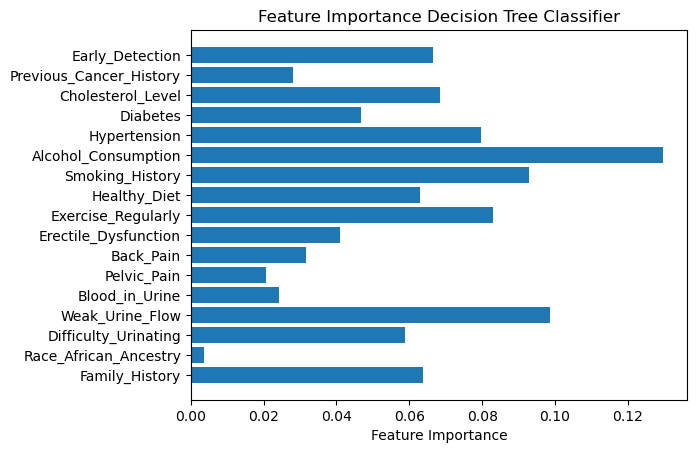

In [1763]:
feature_names = list(X_train.columns)
importances = clf.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Decision Tree Classifier')
plt.show()

In [1765]:
features_to_drop = ['Race_African_Ancestry']
X1_train = X_train.drop(features_to_drop, axis=1)
X1_test = X_test.drop(features_to_drop, axis=1)

In [1767]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X1_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X1_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Evaluate the model with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7889517008826739

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      5018
           1       0.74      0.90      0.81      5065

    accuracy                           0.79     10083
   macro avg       0.80      0.79      0.79     10083
weighted avg       0.80      0.79      0.79     10083



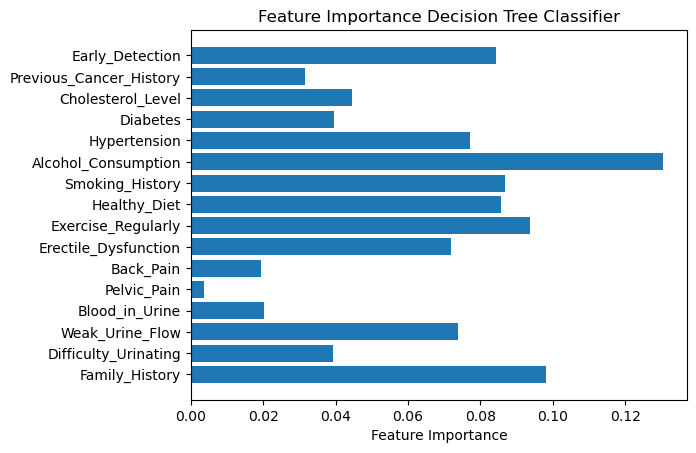

In [1769]:
feature_names = list(X1_train.columns)
importances = clf.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Decision Tree Classifier')
plt.show()

**I will try more advanced models to check for better predictions.**

## Modeling

### Random Forest

In [1814]:
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': stats.randint(20, 150),
    'max_depth': stats.randint(1, 16)
}

class_rf = RandomForestClassifier(random_state=42)
# Create the RandomizedSearchCV object.
random_search = RandomizedSearchCV(class_rf, param_distributions=param_dist, n_iter=100)
# Fit the RandomizedSearchCV object to the training data.
random_search.fit(X1_train, y_train)

# Make predictions
y_pred = random_search.predict(X1_test)

# Evaluate the model with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      5018
           1       0.76      0.89      0.82      5065

    accuracy                           0.80     10083
   macro avg       0.81      0.80      0.80     10083
weighted avg       0.81      0.80      0.80     10083



**Random forest forest did not offer meaningful perforance improvement over a decision tree.**

### XGBoost

In [1775]:
# Define the hyperparameter distributions.
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object.
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object.
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')

# Fit the RandomizedSearchCV object to the training data.
random_search.fit(X1_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002840405A630>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000284309EE150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002840D8C0E90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000028434623B30>},
                   scoring='f1')

In [1777]:
random_search.best_params_

{'learning_rate': 0.09271209944848817,
 'max_depth': 8,
 'n_estimators': 108,
 'subsample': 0.837581415891412}

In [1779]:
# Predicting target values for hold-out data.
random_predictions = random_search.predict(X1_test)
print(classification_report(y_test, random_predictions))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      5018
           1       0.70      0.80      0.74      5065

    accuracy                           0.72     10083
   macro avg       0.73      0.72      0.72     10083
weighted avg       0.73      0.72      0.72     10083



<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

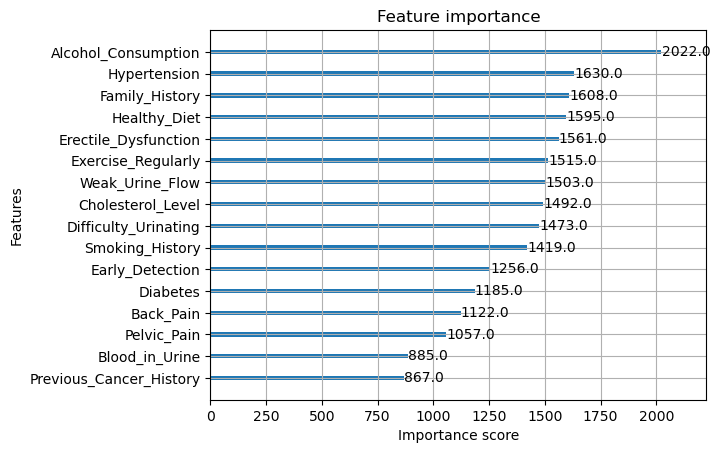

In [1787]:
# Plotting feature importance for xgboost model.
from xgboost import plot_importance
plot_importance(random_search.best_estimator_, importance_type='weight')

**XGBoost performed worse than Random Forest, but Alcohol_Consumption still ranks high in feature importance confirming its high influence.**